In [46]:
import matplotlib.pyplot as plt 
import pandas as pd

In [47]:
england_fouls = pd.read_csv("/Users/kar/Documents/sagb_inrto_project/England/Csvs/England_fouls.csv")

In [48]:
england_fd = pd.read_csv("/Users/kar/Documents/sagb_inrto_project/England/Csvs/England_fd.csv")

In [49]:
england_shots = pd.read_csv("/Users/kar/Documents/sagb_inrto_project/England/Csvs/England_shots.csv")
england_sd = pd.read_csv("/Users/kar/Documents/sagb_inrto_project/England/Csvs/England_sd.csv")

In [50]:
teams_id = pd.read_csv("/Users/kar/Documents/sagb_inrto_project/srcd_data/teams.csv")
teams_id.head()

,city,name,wyId,officialName,area,type
0,Newcastle upon Tyne,Newcastle United,1613,Newcastle United FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
1,Vigo,Celta de Vigo,692,Real Club Celta de Vigo,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
2,Barcelona,Espanyol,691,Reial Club Deportiu Espanyol,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
3,Vitoria-Gasteiz,Deportivo Alav\u00e9s,696,Deportivo Alav\u00e9s,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
4,Valencia,Levante,695,Levante UD,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club


In [51]:
team_fouls = [teams_id.loc[teams_id["wyId"] == row[1]["teamId"]]["name"].to_string().split(' ')[-1] for row in england_fouls.iterrows()]
team_shots = [teams_id.loc[teams_id["wyId"] == row[1]["teamId"]]["name"].to_string().split(' ')[-1] for row in england_shots.iterrows()]

In [52]:
england_fouls.insert(4, "team", team_fouls)
england_shots.insert(4, "team", team_shots)

In [53]:
england_fouls.head(3), england_shots.head(3)

(  subEventName  playerId  matchId  teamId     team    eventSec  eventMin
 0         Foul      8488  2499719    1631     City   54.366200       0.9
 1         Foul      8488  2499719    1631     City  202.040527       3.4
 2         Foul    370224  2499719    1609  Arsenal  708.974878      11.8,
   subEventName  playerId  matchId  teamId     team    eventSec  eventMin
 0         Shot     25413  2499719    1609  Arsenal   94.595788       1.6
 1         Shot     26150  2499719    1631     City  179.854785       3.0
 2         Shot     14763  2499719    1631     City  254.745027       4.2)

In [54]:
def plt_by_team(tbl, metric, color, grid, n_axis, filter):
    team_events = tbl.groupby("team").apply(lambda x: filter(x["eventMin"]), include_groups=False)
    
    teams = team_events.keys()
    events = team_events.values

    scatter = grid[n_axis].scatter(
        x=teams, 
        y=events,
        c=color,
        label=metric) 
    
    return scatter, teams

def plt_by_match(tbl, metric, color,  grid, n_axis, portion): 

    scatter = grid[n_axis].scatter(
        x=tbl["matchId"],
        y=tbl[f'{portion} game {metric} density'],
        c=color
    ) 
    return scatter

def plt_by_two(tbls, metrics, colors, grid, n_axis, filter):
    events_1 = tbls[0].groupby("team").apply(lambda x: filter(x["eventMin"]), include_groups=False)
    events_2 = tbls[1].groupby("team").apply(lambda x: filter(x["eventMin"]), include_groups=False)

    teams = events_1.keys()
    event_1 = events_1.values
   
    event_2 = events_2.values

    scatter = grid[n_axis].scatter(
        x=event_1, 
        y=event_2,
        c=colors,
     ) 
    
    return scatter

def plt_by_match_two(tbl, metric, color,  grid, n_axis, portion): 

    scatter = grid[n_axis].scatter(
        x=tbl[0][f'{portion} game {metric[0]} density'],
        y=tbl[1][f'{portion} game {metric[1]} density'],
        c=color
    ) 
    return scatter

def compute_lg_density(col): 
    total = len(col) 
    lg = len(list(filter(lambda x: x >= 60, col)))
    return lg / total

def compute_eg_density(col): 
    total = len(col) 
    eg = len(list(filter(lambda x: x < 60, col)))
    return eg / total

/var/folders/b2/bccn9f413sx5vqvc3x7cn_6h0000gn/T/ipykernel_541/3263827566.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=80)


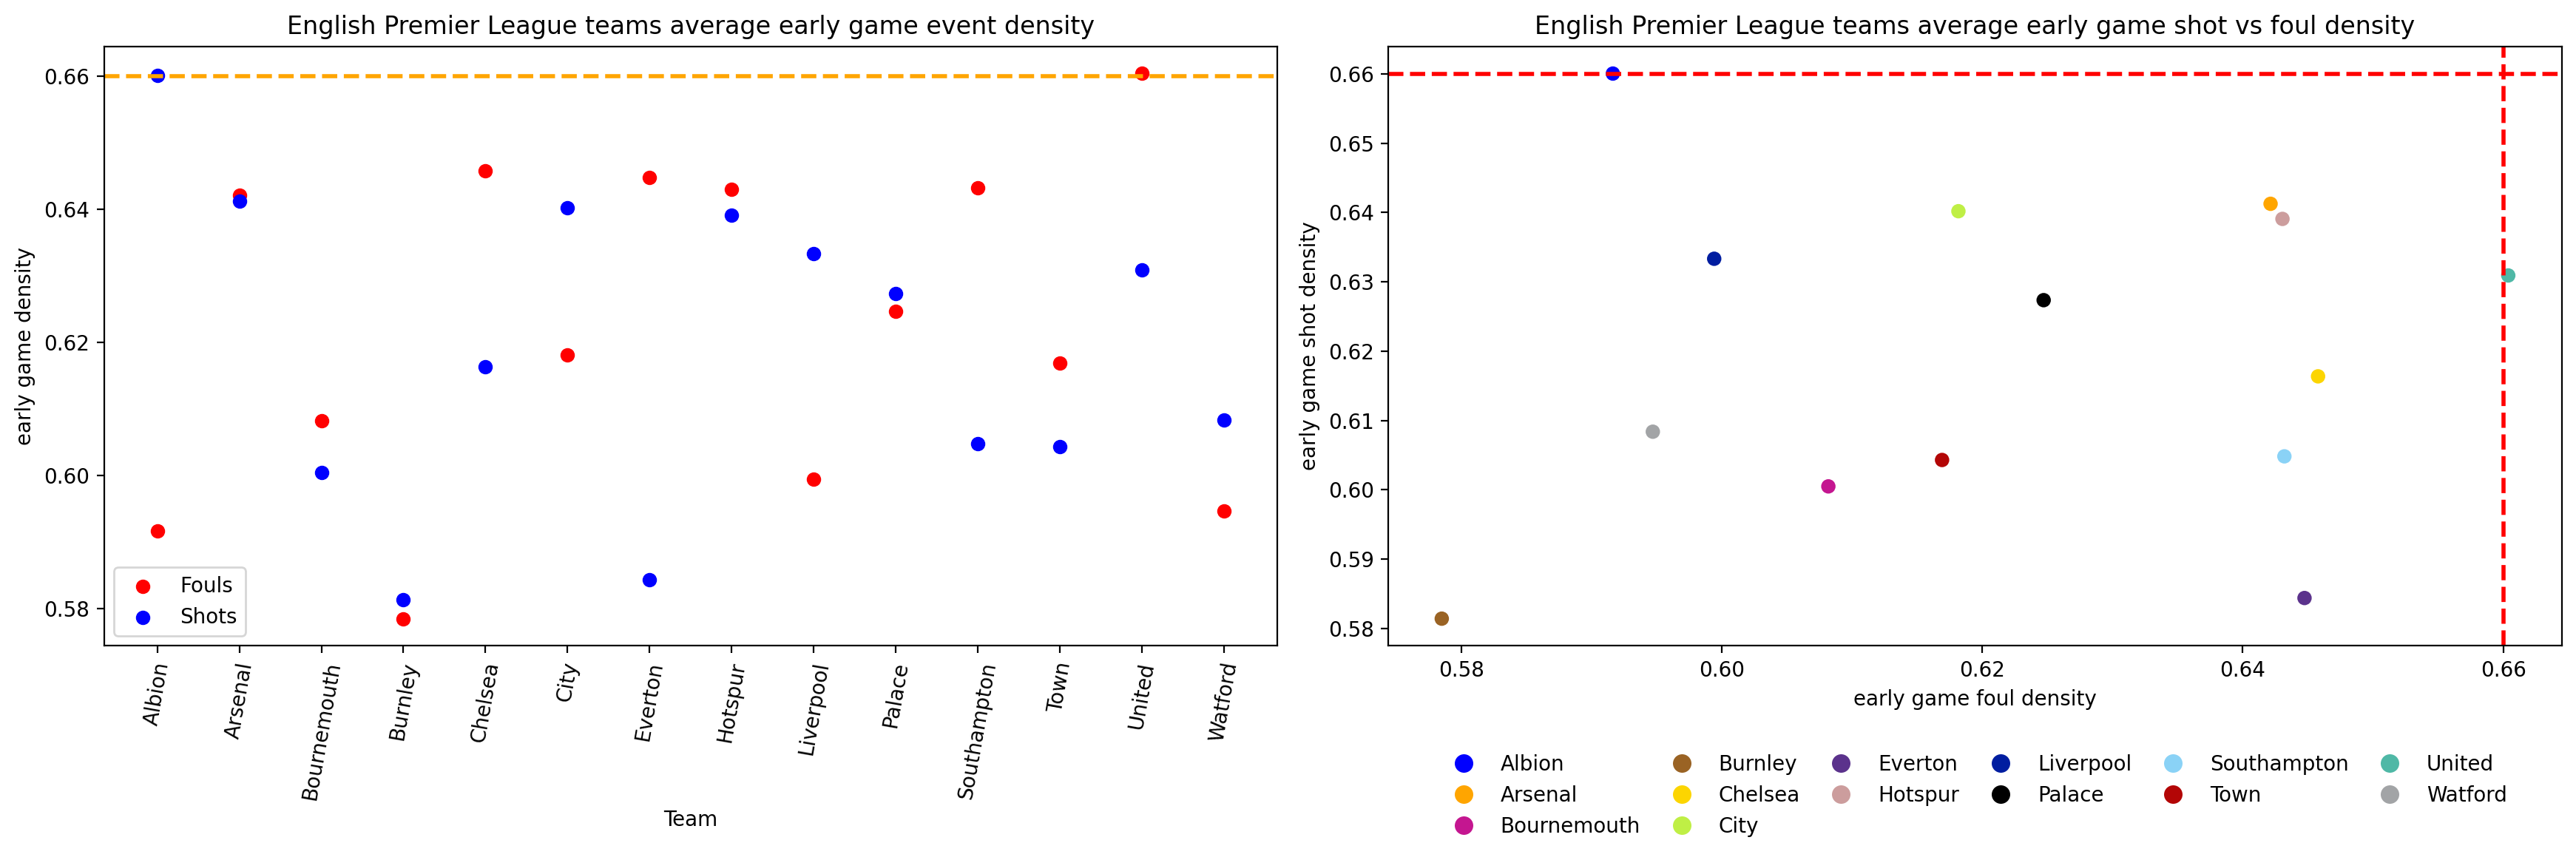

In [55]:
import numpy as np

f_width = 18
f_height = 6
fig, axes = plt.subplots(ncols=2, figsize=(f_width, f_height), dpi=200)

eg_fouls_by_team, teams = plt_by_team(england_fouls, "foul", "red", axes, 0, compute_eg_density)
eg_shots_by_team, teams = plt_by_team(england_shots, "shot", "blue", axes, 0, compute_eg_density)

axes[0].tick_params(axis='x', rotation=80)
axes[0].set_title("English Premier League teams average early game event density")
axes[0].set_xlabel("Team")
axes[0].set_ylabel("early game density")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=80) 
axes[0].axhline(y=0.66, color='orange', linestyle='--', linewidth=2)
axes[0].legend([eg_fouls_by_team, eg_shots_by_team], ['Fouls', 'Shots'])

team_colors = team_colors[:len(teams)]
eg_event_by_team = plt_by_two([england_fouls, england_shots], ["foul", "shot"], team_colors, axes, 1, compute_eg_density)

axes[1].set_title("English Premier League teams average early game shot vs foul density")
axes[1].set_xlabel("early game foul density")
axes[1].set_ylabel("early game shot density")
axes[1].axvline(x=0.66, color='red', linestyle='--', linewidth=2)
axes[1].axhline(y=0.66, color='red', linestyle='--', linewidth=2)

# Create legend handles
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=team, 
                   markerfacecolor=color, markersize=10) 
                   for team, color in zip(teams, team_colors)]

# Add the legend with all teams
axes[1].legend(handles=legend_elements, 
               loc='upper center',
               bbox_to_anchor=(0.5, -0.15),
               ncol=6,
               columnspacing=1,
               frameon=False)

plt.tight_layout()
plt.show()

In [56]:
print(england_fd.columns)
print(england_sd.columns)

Index(['matchId', 'fouls_array', 'total_fouls', 'late_game_fouls',
       'early_game_fouls', 'late_game_density', 'early_game_density'],
      dtype='object')
Index(['matchId', 'shots_array', 'total_shots', 'late_game_shots',
       'early_game_shots', 'late_game_density', 'early_game_density'],
      dtype='object')


In [57]:
def plt_by_match(tbl, metric, color, grid, n_axis, portion): 
    # Adjust column name based on the portion
    if portion == 'early':
        density_column = 'early_game_density'
    elif portion == 'late':
        density_column = 'late_game_density'
    else:
        raise ValueError("Invalid portion. Must be 'early' or 'late'.")

    if density_column not in tbl.columns:
        raise KeyError(f"Column '{density_column}' not found in DataFrame")

    scatter = grid[n_axis].scatter(
        x=tbl["matchId"],
        y=tbl[density_column],
        c=color
    ) 
    return scatter

def plt_by_match_two(tbls, metrics, color, grid, n_axis, portion): 
    # Adjust column names based on the portion
    if portion == 'early':
        density_columns = [f'early_game_density' for _ in metrics]
    elif portion == 'late':
        density_columns = [f'late_game_density' for _ in metrics]
    else:
        raise ValueError("Invalid portion. Must be 'early' or 'late'.")

    if not all(col in tbls[0].columns for col in density_columns) or not all(col in tbls[1].columns for col in density_columns):
        raise KeyError("One or more density columns not found in DataFrame(s)")

    scatter = grid[n_axis].scatter(
        x=tbls[0][density_columns[0]],
        y=tbls[1][density_columns[1]],
        c=color
    ) 
    return scatter

def plt_by_team(tbl, metric, color, grid, n_axis, filter):
    team_events = tbl.groupby("team").apply(lambda x: filter(x["eventMin"]), include_groups=False)
    
    teams = team_events.keys()
    events = team_events.values

    scatter = grid[n_axis].scatter(
        x=teams, 
        y=events,
        c=color,
        label=metric
    ) 
    
    return scatter, teams

def plt_by_two(tbls, metrics, colors, grid, n_axis, filter):
    events_1 = tbls[0].groupby("team").apply(lambda x: filter(x["eventMin"]), include_groups=False)
    events_2 = tbls[1].groupby("team").apply(lambda x: filter(x["eventMin"]), include_groups=False)

    teams = events_1.keys()
    event_1 = events_1.values
    event_2 = events_2.values

    scatter = grid[n_axis].scatter(
        x=event_1, 
        y=event_2,
        c=colors
    ) 
    
    return scatter

def compute_lg_density(col): 
    total = len(col) 
    lg = len(list(filter(lambda x: x >= 60, col)))
    return lg / total

def compute_eg_density(col): 
    total = len(col) 
    eg = len(list(filter(lambda x: x < 60, col)))
    return eg / total

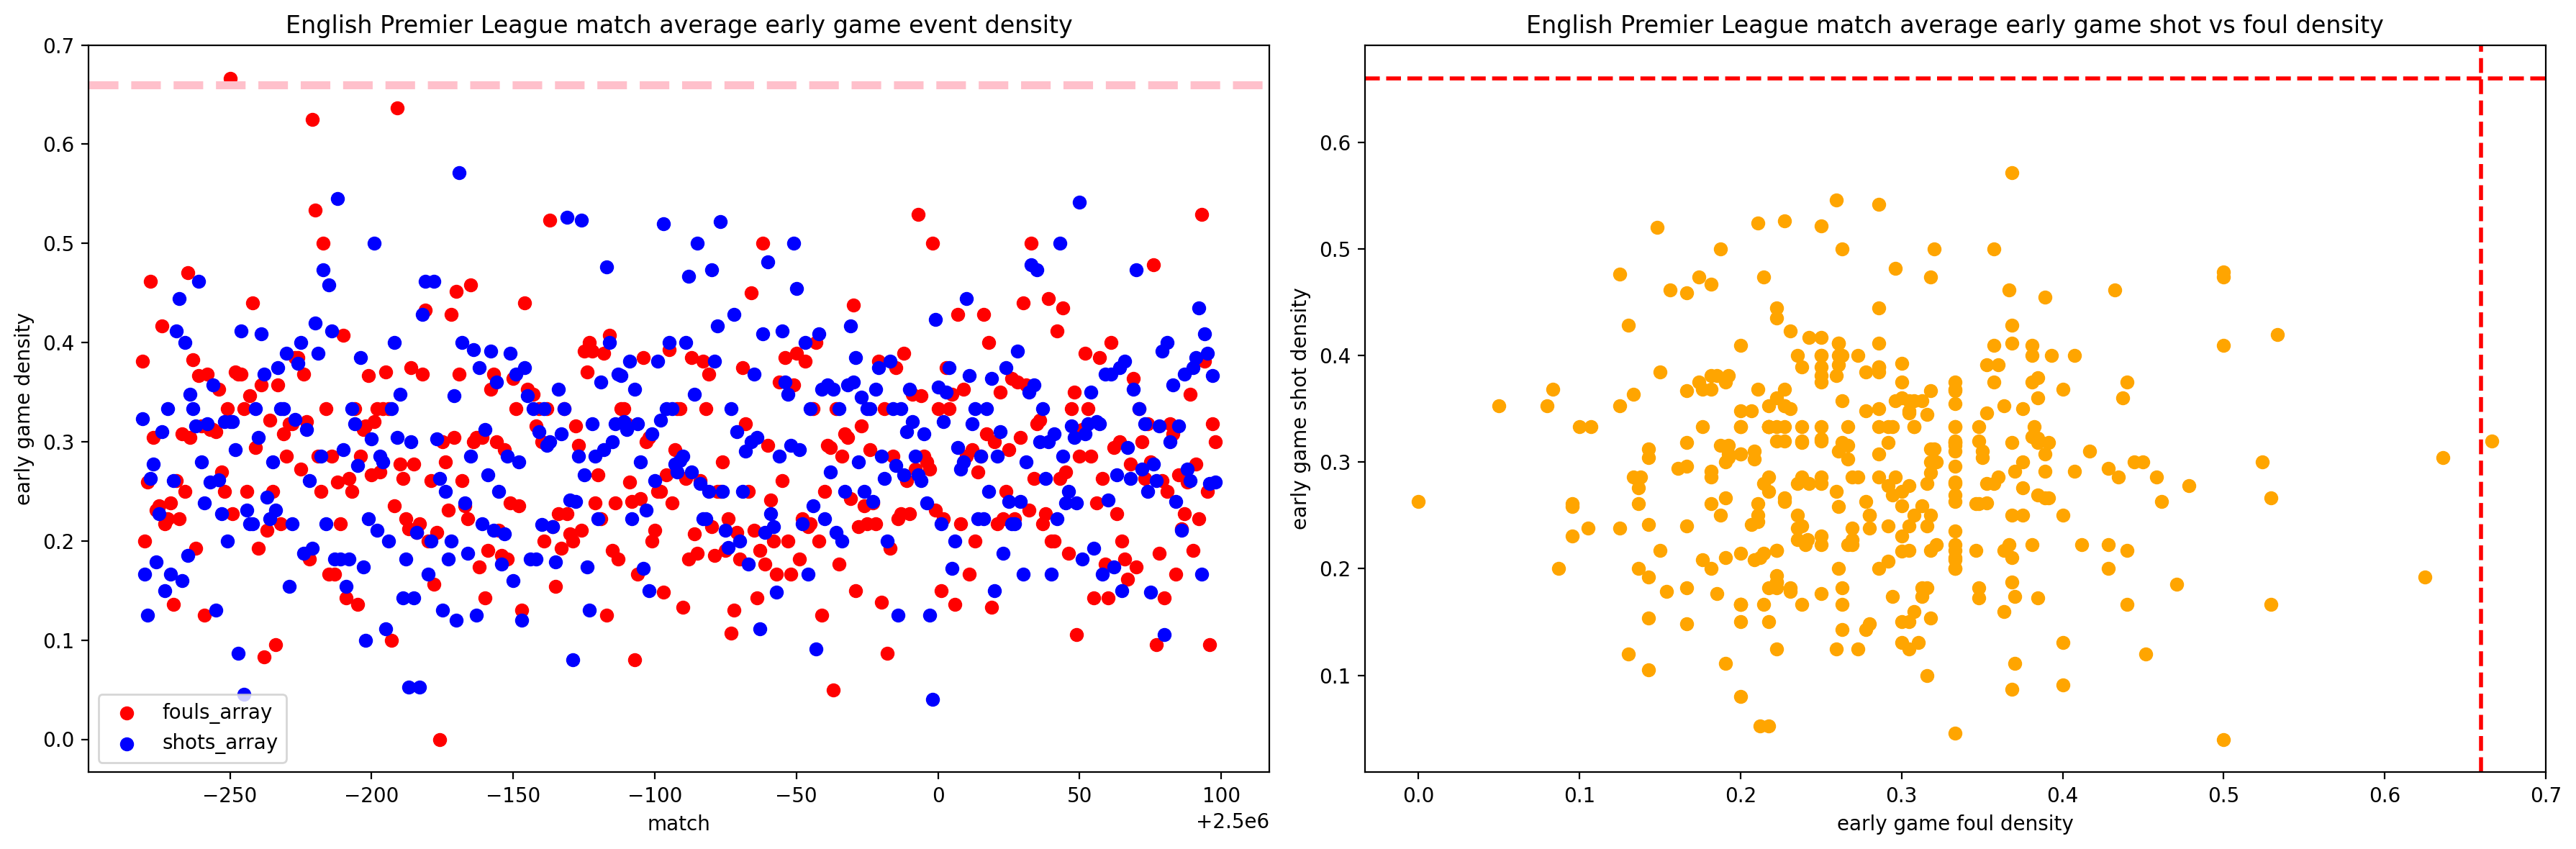

In [58]:
f_width = 18
f_height = 6
fig, axes = plt.subplots(ncols=2, figsize=(f_width, f_height), dpi=200)

eg_fouls_by_match = plt_by_match(england_fd, "foul", "red", axes, 0, "early")
eg_shots_by_match = plt_by_match(england_sd, "shot", "blue", axes, 0, "early")

axes[0].set_title("English Premier League match average early game event density")
axes[0].set_xlabel("match")
axes[0].set_ylabel("early game density")
axes[0].legend([eg_fouls_by_match, eg_shots_by_match], ['fouls_array', 'shots_array'])
axes[0].axhline(y=0.66, color='pink', linestyle='--', linewidth=4)

eg_event_by_match = plt_by_match_two([england_fd, england_sd], ["foul", "shot"], "orange", axes, 1, "early")

axes[1].set_title("English Premier League match average early game shot vs foul density")
axes[1].set_xlabel("early game foul density")
axes[1].set_ylabel("early game shot density")
axes[1].axvline(x=0.66, color='red', linestyle='--', linewidth=2)
axes[1].axhline(y=0.66, color='red', linestyle='--', linewidth=2)

plt.tight_layout()
plt.show()

/var/folders/b2/bccn9f413sx5vqvc3x7cn_6h0000gn/T/ipykernel_541/1091468746.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=80)


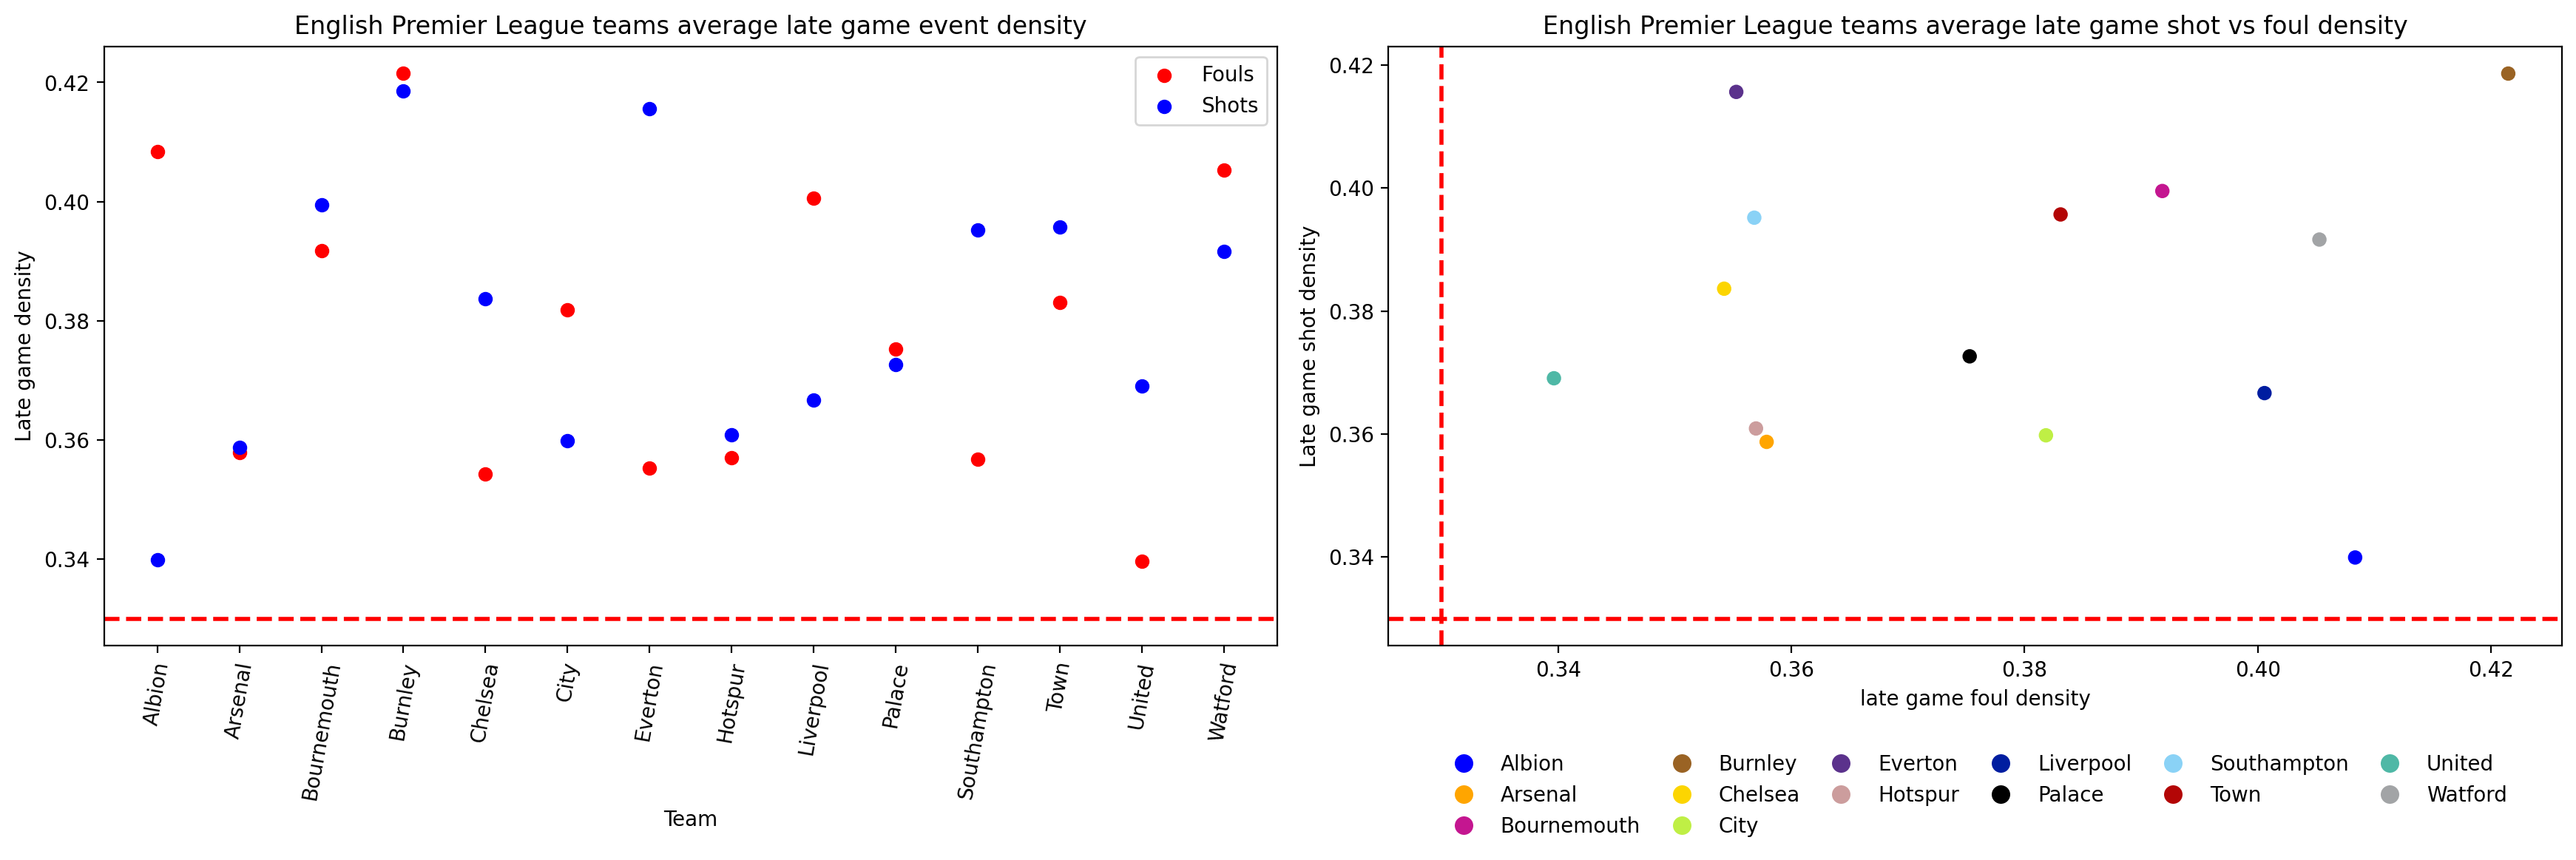

In [61]:
f_width = 18
f_height = 6
fig, axes = plt.subplots(ncols=2, figsize=(f_width, f_height), dpi=200)

lg_fouls_by_team, teams = plt_by_team(england_fouls, "foul", "red", axes, 0, compute_lg_density)
lg_shots_by_team, teams = plt_by_team(england_shots, "shot", "blue", axes, 0, compute_lg_density)

axes[0].set_title("English Premier League teams average late game event density")
axes[0].set_xlabel("Team")
axes[0].set_ylabel("Late game density")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=80) 
axes[0].legend([lg_fouls_by_team, lg_shots_by_team], ['Fouls', 'Shots'])
axes[0].axhline(y=0.33, color='red', linestyle='--', linewidth=2)

team_colors = team_colors[:len(teams)]
lg_event_by_team = plt_by_two([england_fouls, england_shots], ["foul", "shot"], team_colors, axes, 1, compute_lg_density)

axes[1].set_title("English Premier League teams average late game shot vs foul density")
axes[1].set_xlabel("late game foul density")
axes[1].set_ylabel("Late game shot density")
axes[1].axvline(x=0.33, color='red', linestyle='--', linewidth=2)
axes[1].axhline(y=0.33, color='red', linestyle='--', linewidth=2)
# Create legend handles
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=team, 
                   markerfacecolor=color, markersize=10) 
                   for team, color in zip(teams, team_colors)]

# Add the legend with all teams
axes[1].legend(handles=legend_elements, 
               loc='upper center',
               bbox_to_anchor=(0.5, -0.15),
               ncol=6,
               columnspacing=1,
               frameon=False)

plt.tight_layout()
plt.show()

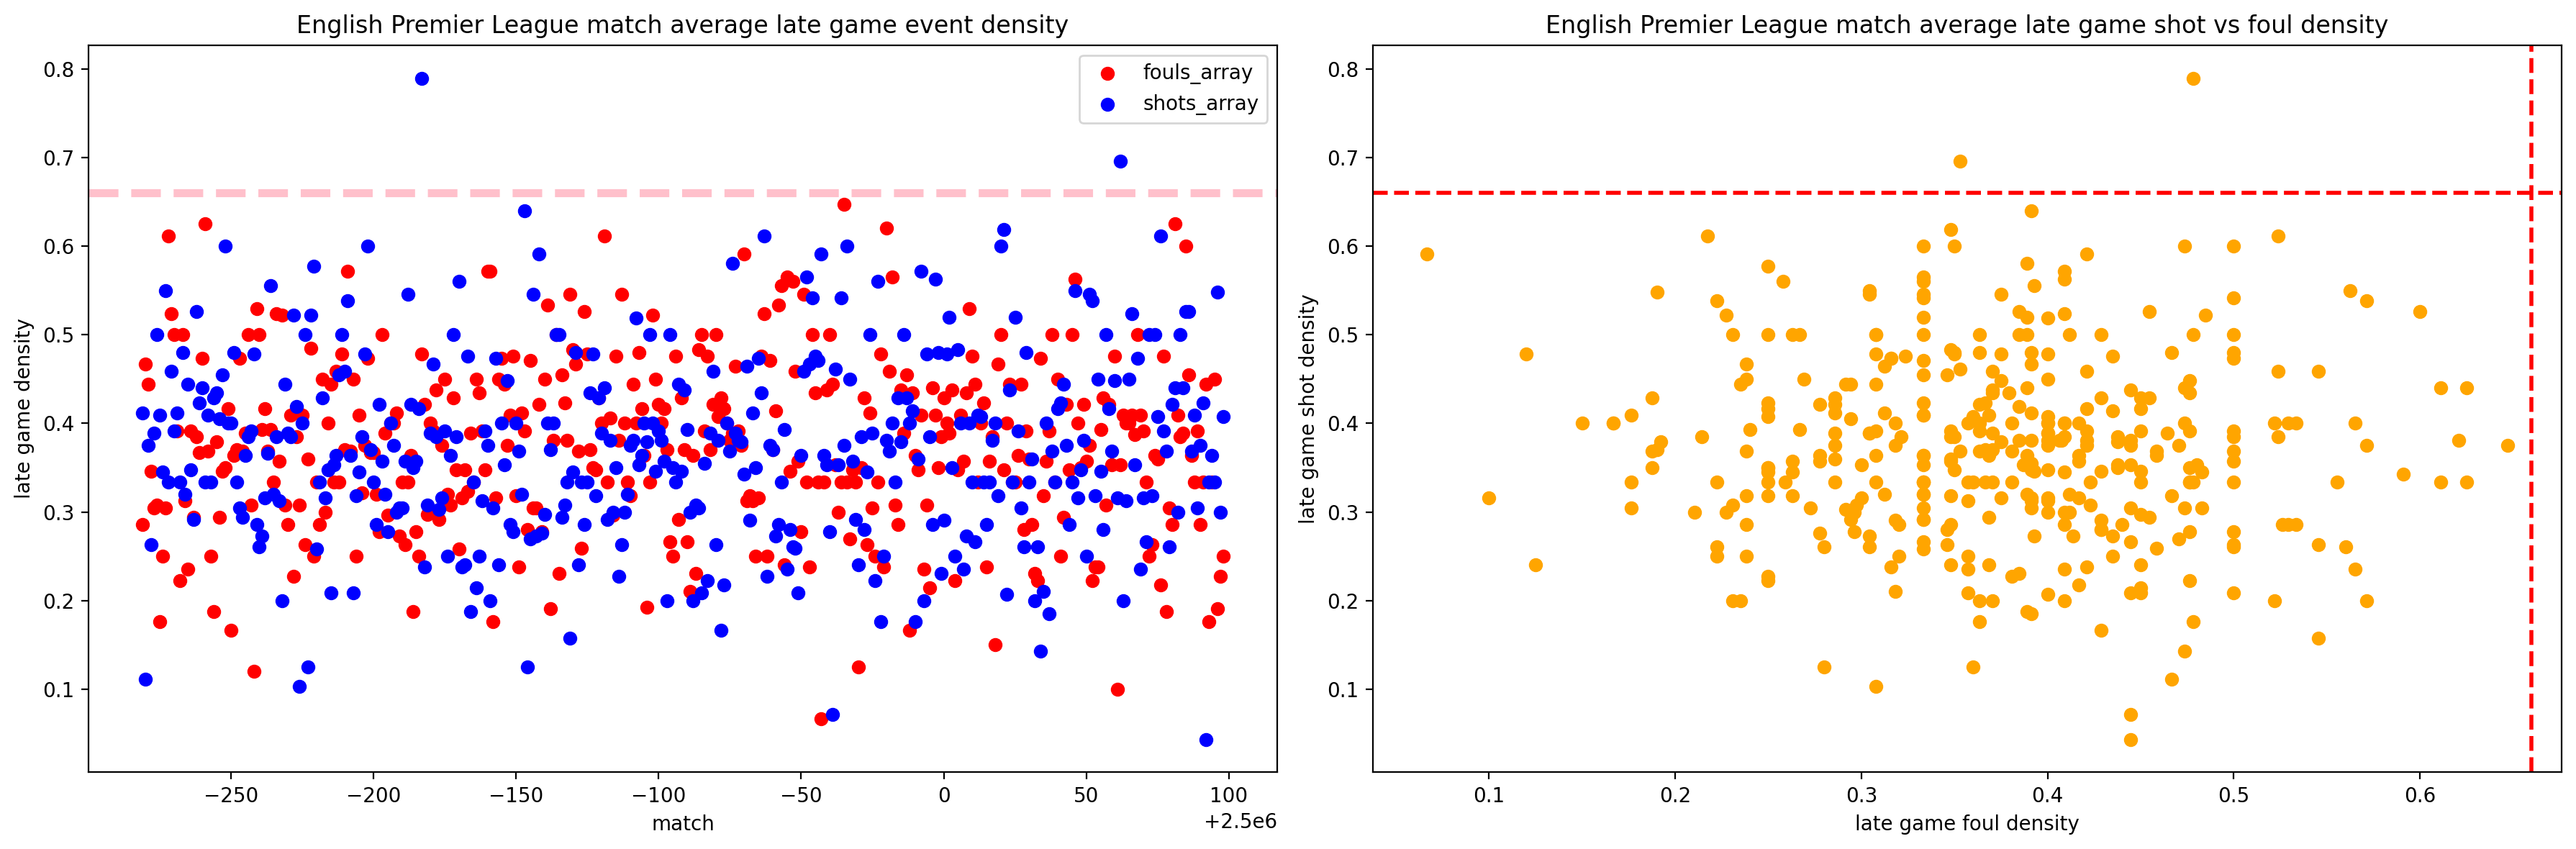

In [62]:
f_width = 18
f_height = 6
fig, axes = plt.subplots(ncols=2, figsize=(f_width, f_height), dpi=200)

lg_fouls_by_match = plt_by_match(england_fd, "foul", "red", axes, 0, "late")
lg_shots_by_match = plt_by_match(england_sd, "shot", "blue", axes, 0, "late")

axes[0].set_title("English Premier League match average late game event density")
axes[0].set_xlabel("match")
axes[0].set_ylabel("late game density")
axes[0].legend([lg_fouls_by_match, lg_shots_by_match], ['fouls_array', 'shots_array'])
axes[0].axhline(y=0.66, color='pink', linestyle='--', linewidth=4)

eg_event_by_match = plt_by_match_two([england_fd, england_sd], ["foul", "shot"], "orange", axes, 1, "late")

axes[1].set_title("English Premier League match average late game shot vs foul density")
axes[1].set_xlabel("late game foul density")
axes[1].set_ylabel("late game shot density")
axes[1].axvline(x=0.66, color='red', linestyle='--', linewidth=2)
axes[1].axhline(y=0.66, color='red', linestyle='--', linewidth=2)

plt.tight_layout()
plt.show()